In [ ]:
!pip install ClusterEnsembles

     |████████████████████████████████| 297 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 35.0 MB/s 
     |████████████████████████████████| 38.1 MB 2.3 MB/s 
  Created wheel for pymetis: filename=PyMetis-2020.1-cp37-cp37m-linux_x86_64.whl size=278348 sha256=69c34200f68fa5007654edd0655af2010112cd8de7261c393d9a23c0c93e6c9a
  Stored in directory: /root/.cache/pip/wheels/fc/6a/69/a4296ff80443cd9b3876eaea9bd8dfeed30cc8443708848097
Successfully built pymetis
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import cycle, islice
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

import pandas as pd
df = pd.DataFrame(np.random.randint(0,100,size=(971, 72)))
df = df.sample(frac=1, random_state=111).reset_index(drop=True)#[:-1]
splits=10
N=len(df)
Xs=[]
df.to_csv('randdf.csv')
for i in range(splits):
    dff=df[i*N//splits:(i+1)*N//splits]
    Xs.append(MinMaxScaler().fit_transform(dff.fillna(0).to_numpy()))    
#X=MinMaxScaler().fit_transform(df.fillna(0).to_numpy())



In [ ]:
#@title
from sklearn.metrics import davies_bouldin_score
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import operator

dbsc= [[0 for i in range(3)] for j in range(len(Xs))]
km = [[0 for i in range(3)] for j in range(len(Xs))]
spec = [[0 for i in range(3)] for j in range(len(Xs))]
for i, X in enumerate(Xs):
    #X = MinMaxScaler().fit_transform(df)
    #from jqmcvi import base
    s_score = []
    ch_score = []
    dunn_score = []
    db_score = []
    epss = [x / 100.0 for x in range(300, 320, 5)]
    #for i in range():
    for eps in epss:
        db = DBSCAN(eps=eps).fit(X)
        #kmeanModel = kmeanModel.fit(X)
        labels = db.labels_
        try:
            score = metrics.silhouette_score(X, labels, metric='euclidean')
            s_score.append(score)
        except: 
            try:
                s_score.append(score)
            except: pass    
        try:  
            score = metrics.calinski_harabasz_score(X, labels)   
            ch_score.append(score)
            db_score.append(metrics.davies_bouldin_score(X, labels))
        except: pass    
        #dunn_score.append(base.dunn())
    
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    dbsc[i][0] = epss[index]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    dbsc[i][1] = epss[index]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    dbsc[i][2] = epss[index]
print('done')
for i, X in enumerate(Xs):
    from sklearn.metrics import davies_bouldin_score
    import sklearn
    from sklearn import metrics
    from sklearn.cluster import KMeans

    import numpy as np

    from sklearn.cluster import DBSCAN
    from sklearn import metrics
    from sklearn.datasets import make_blobs
    from sklearn.preprocessing import MinMaxScaler

    #X = MinMaxScaler().fit_transform(df)

    s_score = []
    ch_score = []
    db_score = []
    #for i in range():
    K = range(2,11)
    #for i in range():
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=0)
        kmeanModel = kmeanModel.fit(X)
        labels = kmeanModel.labels_
        score = metrics.silhouette_score(X, labels, metric='euclidean')
        s_score.append(score)    
        score = metrics.calinski_harabasz_score(X, labels)   
        ch_score.append(score)
        db_score.append(metrics.davies_bouldin_score(X, labels))
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    km[i][0] = K[index]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    km[i][1] = K[index]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    km[i][2] = K[index]
print('done')
for i, X in enumerate(Xs):
    from sklearn.metrics import davies_bouldin_score
    import sklearn
    from sklearn import metrics
    from sklearn.cluster import KMeans
    import numpy as np

    from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
    from sklearn import metrics
    from sklearn.datasets import make_blobs
    from sklearn.preprocessing import MinMaxScaler

    #X = MinMaxScaler().fit_transform(df)
    #from jqmcvi import base
    s_score = []
    ch_score = []
    dunn_score = []
    db_score = []
    epss = [x for x in range(2, 11, 1)]
    #for i in range():
    for eps in epss:
        db = SpectralClustering(n_clusters=eps).fit(X)
        #kmeanModel = kmeanModel.fit(X)
        labels = db.labels_
        try:
            score = metrics.silhouette_score(X, labels, metric='euclidean')
            s_score.append(score)
        except: 
            try:
                s_score.append(score)
            except: pass    
        try:  
            score = metrics.calinski_harabasz_score(X, labels)   
            ch_score.append(score)
            db_score.append(metrics.davies_bouldin_score(X, labels))
        except: pass    
        #dunn_score.append(base.dunn())
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    spec[i][0] = epss[index]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    spec[i][1] = epss[index]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    spec[i][2] = epss[index]

done
done


In [ ]:
newXs=[]
for i in range(len(dbsc)):
    dbsc[i]=list(set(dbsc[i]))
    km[i]=list(set(km[i]))
    spec[i]=list(set(spec[i]))
for i, X in enumerate(Xs):
    newX = pd.DataFrame(data=X, columns=df.columns)
    for j in dbsc[i]:
        db=DBSCAN(eps=j).fit(X)
        newX['DBSCAN eps={} labels'.format(j)]=db.labels_
    for j in km[i]:
        kmeans=KMeans(n_clusters=j, random_state=0).fit(X)
        newX['{}-Means labels'.format(j)]=kmeans.labels_
    for j in spec[i]:
        sc=SpectralClustering(n_clusters=j).fit(X)    
        newX['Spectral k={} labels'.format(j)]=sc.labels_
    newXs.append(newX)    
    #print(newX)

In [ ]:
import pandas as pd
import numpy as np
labelss=[]
for i, newX in enumerate(newXs):
    labels=newX.iloc[:,-(len(newX.columns)-len(df.columns)):].replace(-1, np.nan).to_numpy()
    labelss.append(labels)
print(labels)    
#df = pd.read_csv('newdata.csv')
#labels=df.iloc[:,-4:].replace(-1, np.nan).to_numpy()
#labels=labels[:,:-1]

[[nan  0.  0.  3.  1.  0.]
 [ 0.  0.  1.  8.  0.  7.]
 [nan  0.  1.  6.  0.  5.]
 [ 0.  0.  1.  4.  0.  3.]
 [nan nan  0.  6.  0.  0.]
 [ 0.  0.  0.  5.  1.  4.]
 [ 0.  0.  1.  7.  0.  0.]
 [nan  0.  1.  8.  0.  1.]
 [ 0.  0.  1.  9.  0.  9.]
 [ 0.  0.  1.  4.  0.  3.]
 [ 0.  0.  0.  4.  1.  3.]
 [ 0.  0.  1.  1.  0.  3.]
 [ 0.  0.  0.  2.  0.  6.]
 [nan  0.  0.  7.  0.  1.]
 [nan  0.  0.  3.  1.  1.]
 [ 0.  0.  0.  7.  1.  0.]
 [ 0.  0.  0.  4.  1.  3.]
 [ 0.  0.  0.  3.  0.  1.]
 [ 0.  0.  0.  2.  0.  6.]
 [ 0.  0.  1.  6.  0.  5.]
 [nan  0.  0.  7.  0.  0.]
 [ 0.  0.  1.  4.  0.  5.]
 [ 0.  0.  0.  0.  1.  3.]
 [ 0.  0.  1.  4.  0.  3.]
 [ 0.  0.  1.  4.  1.  3.]
 [ 0.  0.  0.  6.  0.  1.]
 [ 0.  0.  1.  7.  1.  0.]
 [ 0.  0.  1.  2.  0.  9.]
 [ 0.  0.  0.  6.  0.  5.]
 [nan nan  1.  2.  0.  3.]
 [ 0.  0.  1.  1.  0.  1.]
 [nan  0.  1.  3.  0.  1.]
 [nan nan  0.  0.  0.  7.]
 [ 0.  0.  1.  3.  0.  5.]
 [ 0.  0.  0.  4.  0.  5.]
 [ 0.  0.  1.  6.  0.  5.]
 [ 0.  0.  1.  4.  0.  1.]
 

In [ ]:
import ClusterEnsembles as CE 
label_ces=[]

for i, labels in enumerate(labelss):
    #sys.stdout = open('file', 'w')
    for j in range(2,3):
        label_ce = CE.cluster_ensembles(labels.T, nclass=j, solver='all', random_state=0, verbose=True)
        newXs[i]['labels']=label_ce
    label_ces.append(label_ce)
    print('-------------------------------------------------------------------------------------------------------------------------------------------')

#df['Consensus']=label_ce
#df.to_csv('cons.scv')

Cluster Ensembles
    - Number of classes: 2
    - Solver: all
    - Length of labels: 97
    - Number of labels: 6
    - ANMI:
        - hgpa : 0.12787994614950918
        - mcla : 0.9634419386758796
        - hbgf : 0.09655754061244078
        - cspa : 0.15952924704388707
        - nmf : 0.41669773418204703
    - Best solver: mcla
-------------------------------------------------------------------------------------------------------------------------------------------
Cluster Ensembles
    - Number of classes: 2
    - Solver: all
    - Length of labels: 97
    - Number of labels: 7
    - ANMI:
        - hgpa : 0.553051626305295
        - mcla : 0.15645998931895902
        - hbgf : 0.5540991405296677
        - cspa : 0.6474358886418122
        - nmf : 0.6474358886418122
    - Best solver: cspa
-------------------------------------------------------------------------------------------------------------------------------------------
Cluster Ensembles
    - Number of classes: 2
    - Sol

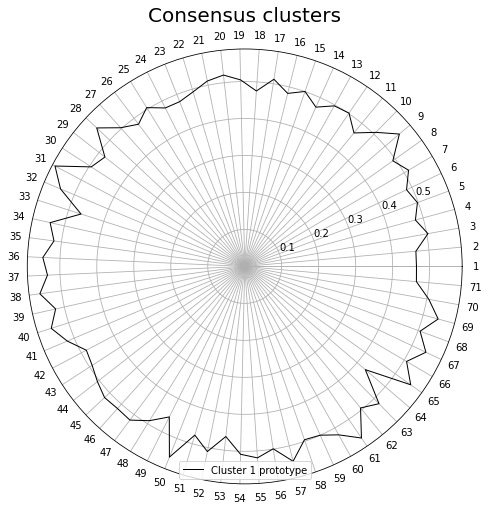

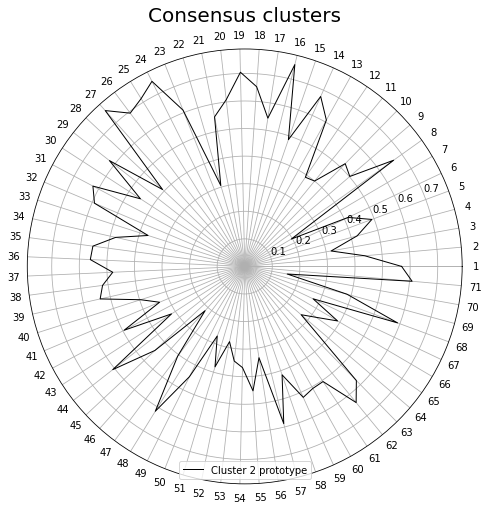

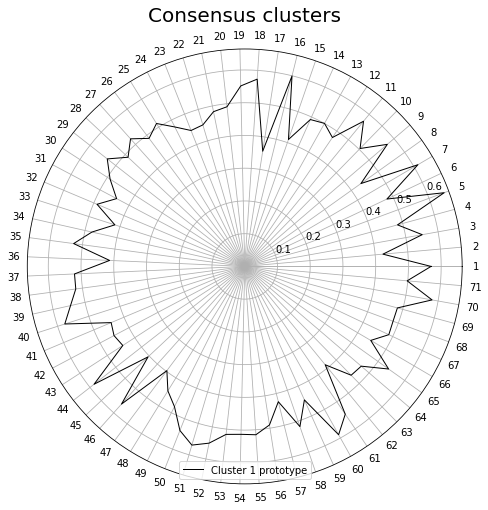

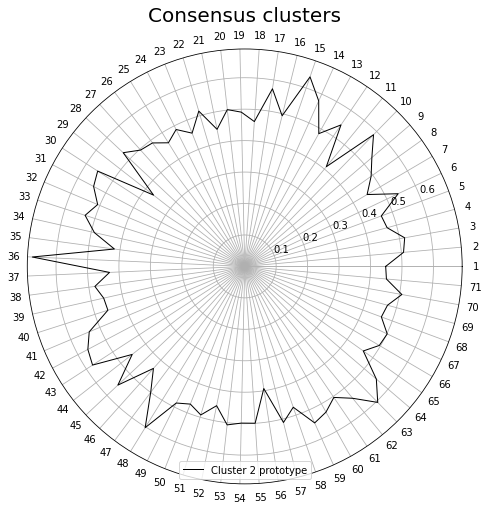

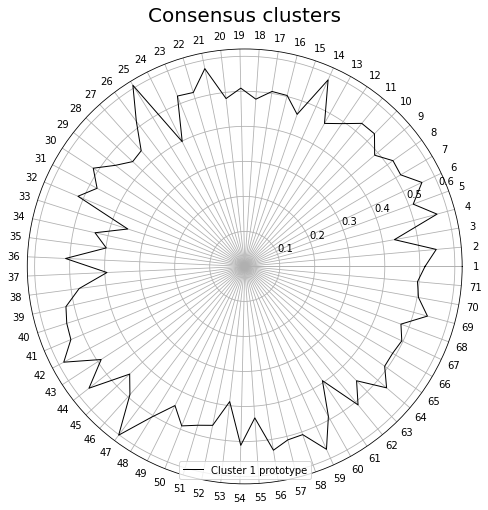

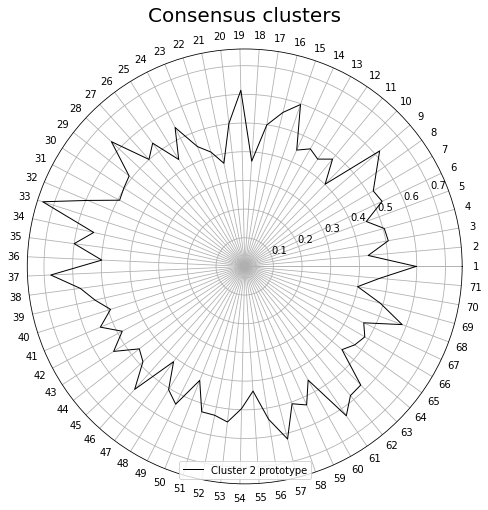

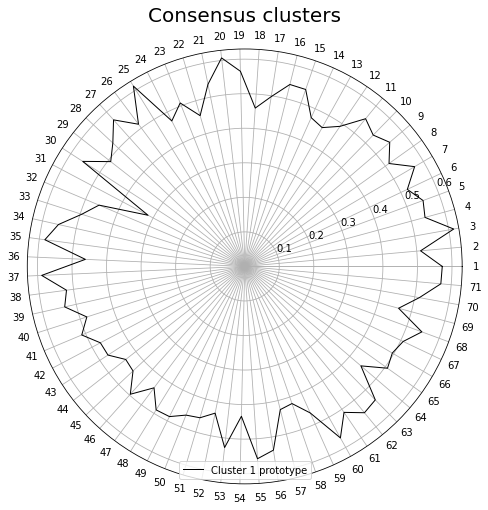

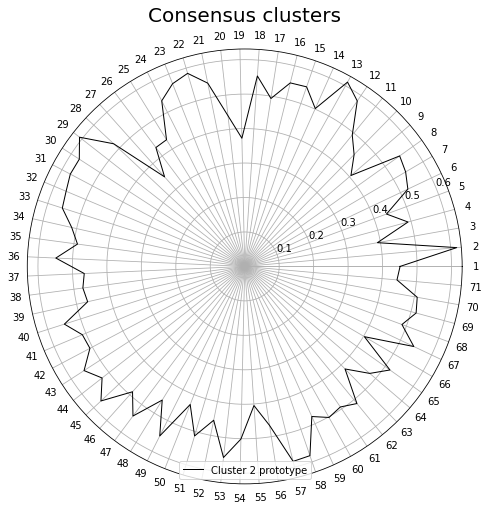

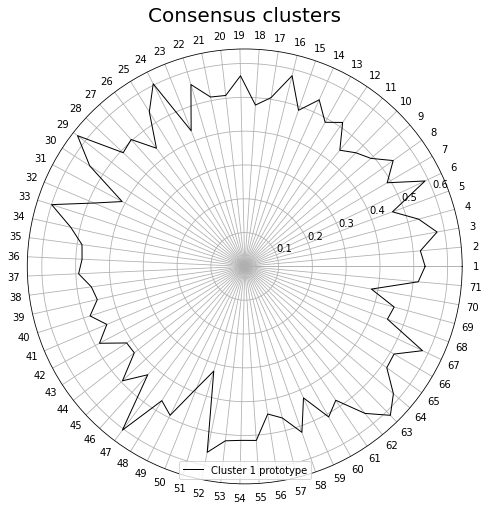

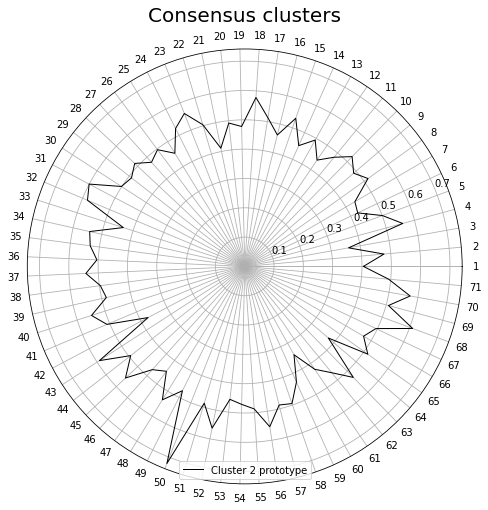

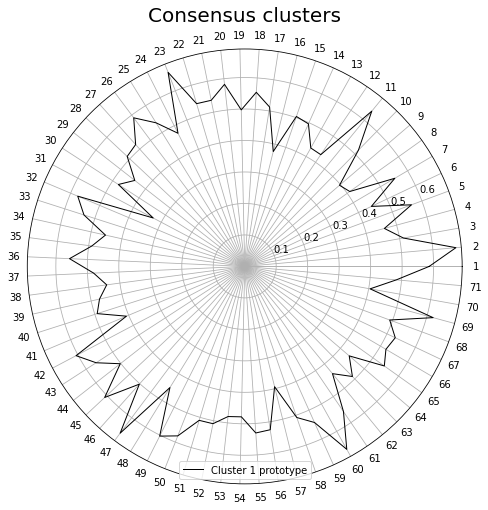

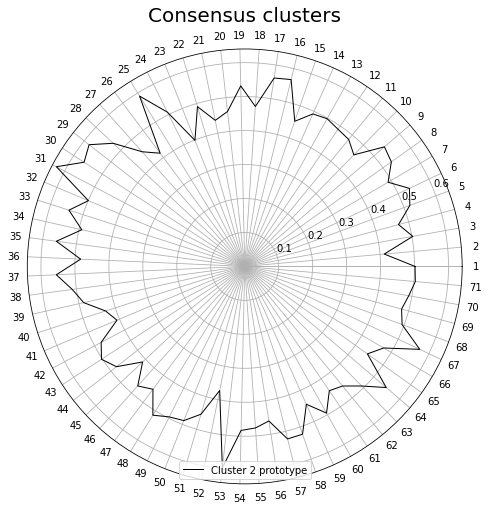

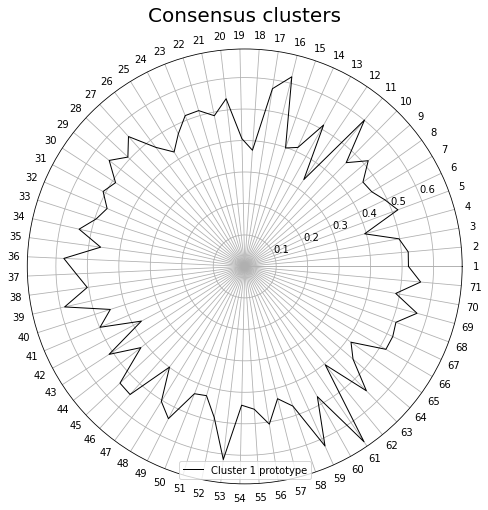

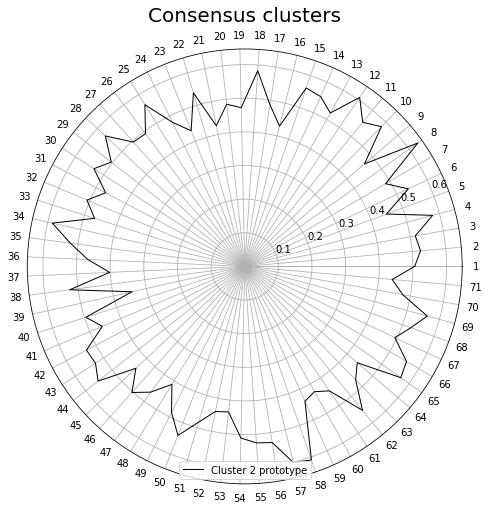

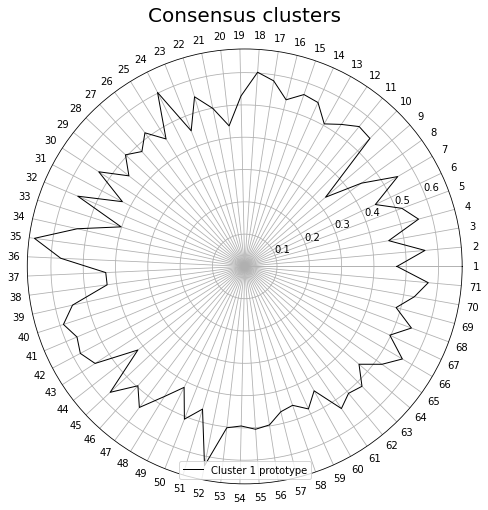

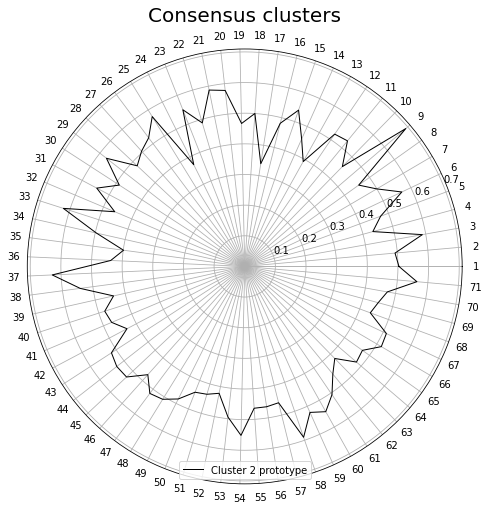

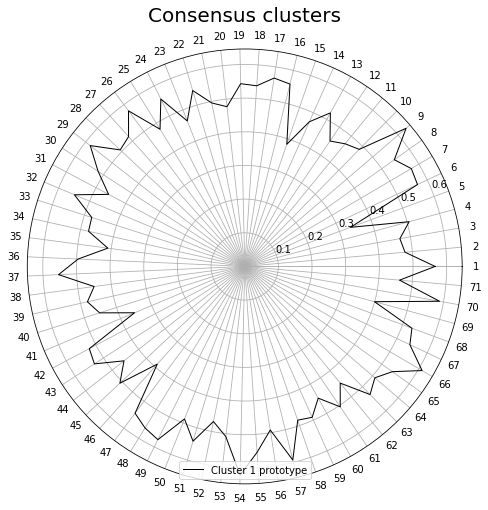

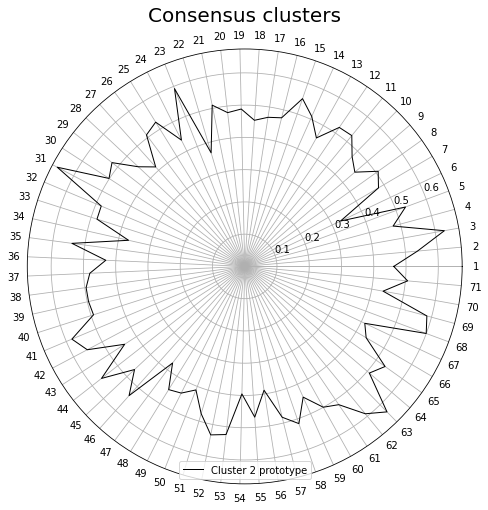

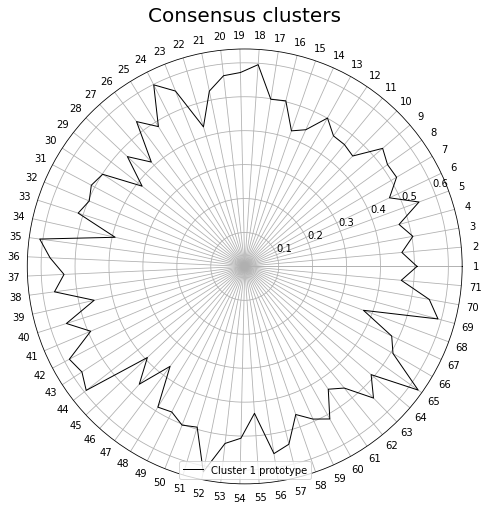

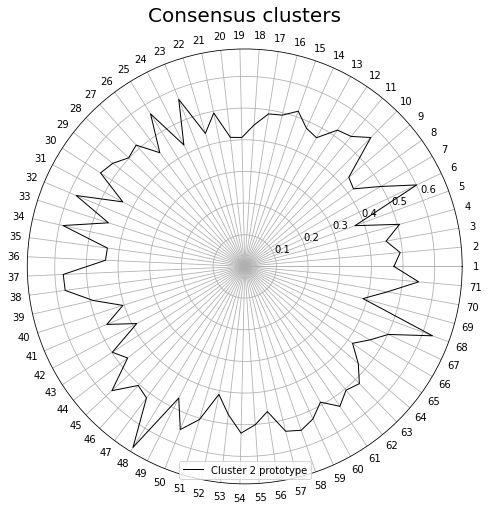

In [ ]:
cents=[]
for t, X in enumerate(newXs):
    centroid_of_cluster = []
    #df=pd.read_csv('df.csv').drop(['repo_fullname', 'id'], axis=1).iloc[:,:-2]#.drop(['Repo'], axis=1).iloc[:,:-4]
    #print(df)
    #df=pd.read_csv(url2)
    #df = df.drop(['Repo'], axis=1)
    #for col in df.columns:
    #    df[col] = df[col].apply(clean_currency).astype('float')
    #X=MinMaxScaler().fit_transform(df.fillna(0).to_numpy())
    #X=df.fillna(0).to_numpy()
    #X=df.drop(['Repo'], axis=1).to_numpy()[:,:-7]

    labels = label_ces[t]
    #print(X)
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    if True:
        for i in set(labels):
            #if i!=-1:
            points_of_cluster = X.iloc[:,:-(len(X.columns)-len(df.columns))-1].to_numpy()[labels==i,:]
            #print(len(X[labels==i,:]))
            #print(points_of_cluster)
            centroid_of_cluster.append(np.mean(points_of_cluster, axis=0))

        for i in range(2):
            # #############################################################################
            # Plot result
            try:
                import matplotlib.pyplot as plt

                # Black removed and is used for noise instead.
                unique_labels = set(labels)
                colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

                    

                #plt.title("Estimated number of clusters: %d" % n_clusters_)

                centers = centroid_of_cluster
                categories=range(1,72)#df.columns
                lst = []
                lstkst = []
                for j in range(len(centers)):
                    lst = centers[j].tolist()
                    lst.append(centers[j][0])
                    lstkst.append(lst)
                #print(lstkst)    
                centers = np.array([np.array(xi) for xi in lstkst])
                scaler = MinMaxScaler().fit(centers)
                #centers = scaler.transform(centers)
                label_loc = np.linspace(start=0, stop=2 * np.pi, num=71+1)
                #print(centers[0])
                plt.figure(figsize=(8, 8))
                plt.subplot(polar=True)
                
                #plt.plot(label_loc, centers[0], label='Cluster 1 prototype', color='Black', linewidth=1.0)
                
                plt.plot(label_loc, centers[i], label='Cluster {} prototype'.format(i+1), color='Black', linewidth=1.0)
                
                #plt.plot(label_loc, centers[2], label='Cluster 2 prototype', color='Black', linewidth=1.0)

                plt.title('Consensus clusters', size=20)
                lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
                plt.legend(loc=8)
                plt.savefig('{}.tiff'.format('consensus{}'.format(i+1)))
                plt.show()   
                #maxx=[0]*81
                #minn=[10]*81
                #stdevs=[0]*81
                #for i in categories:
                #    devs=[]
                #    for j in range(len(centers)):
                #        maxx[i-1]=max(centers[j][i-1],maxx[i-1])
                #        minn[i-1]=min(centers[j][i-1],minn[i-1])
                #        devs.append(centers[j][i-1])
                #    stdevs[i-1]=np.std(devs)
                #print(stdevs)
                #stdevs[i]=np.std(devs)
                #maxx[i]=max(centers[j][i],maxx[i])
                #minn[i]=min(centers[j][i],minn[i])  
                centold=centers
                cents.append(centold)
            except: pass

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 5.4 MB/s 


20


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


[[0.         0.         1.         1.         0.         0.
  1.         1.         1.         1.         0.04029842]
 [1.         1.         0.         0.         1.         1.
  0.         0.         0.         0.         0.02683375]]
whhr (array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]))


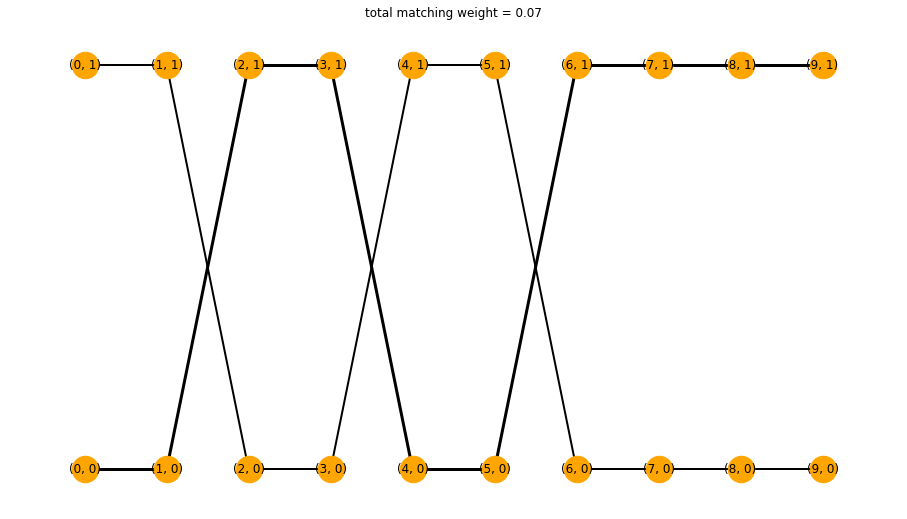

In [ ]:
# import modules
import copy
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pulp

# number of people (or items) per group (or dimension)
dims = [2,2,2,2,2,2,2,2,2,2]

# dummy weight array
# (one weight for each combination of people, with one from each group)
np.random.seed(0)
#db21=np.delete(db21, (db21.shape[0]-1), axis=0)
models = np.array(cents)
print(len(models))

weights = np.empty(dims) #np.random.rand(*dims)

for i in range(len(models[0])):
    for j in range(len(models[1])):
        for k in range(len(models[2])):
            for e in range(len(models[3])):
                for r in range(len(models[4])):
                    for t in range(len(models[5])):
                        for y in range(len(models[6])):
                            for u in range(len(models[7])):
                                for o in range(len(models[8])):
                                    for p in range(len(models[9])):
                                        weights[i][j][k][e][r][t][y][u][o][p]=\
                        1.0/(np.linalg.norm(models[0][i]-models[1][j])+\
                             np.linalg.norm(models[0][i]-models[2][k])+\
                             np.linalg.norm(models[0][i]-models[3][e])+\
                             np.linalg.norm(models[0][i]-models[4][r])+\
                             np.linalg.norm(models[0][i]-models[5][t])+\
                             np.linalg.norm(models[0][i]-models[6][y])+\
                             np.linalg.norm(models[0][i]-models[7][u])+\
                             np.linalg.norm(models[0][i]-models[8][o])+\
                             np.linalg.norm(models[0][i]-models[9][p])+\
                             np.linalg.norm(models[1][j]-models[2][k])+\
                             np.linalg.norm(models[1][j]-models[3][e])+\
                             np.linalg.norm(models[1][j]-models[4][r])+\
                             np.linalg.norm(models[1][j]-models[5][t])+\
                             np.linalg.norm(models[1][j]-models[6][y])+\
                             np.linalg.norm(models[1][j]-models[7][u])+\
                             np.linalg.norm(models[1][j]-models[8][o])+\
                             np.linalg.norm(models[1][j]-models[9][p])+\
                             np.linalg.norm(models[2][k]-models[3][e])+\
                             np.linalg.norm(models[2][k]-models[4][r])+\
                             np.linalg.norm(models[2][k]-models[5][t])+\
                             np.linalg.norm(models[2][k]-models[6][y])+\
                             np.linalg.norm(models[2][k]-models[7][u])+\
                             np.linalg.norm(models[2][k]-models[8][o])+\
                             np.linalg.norm(models[2][k]-models[9][p])+\
                             np.linalg.norm(models[3][e]-models[4][r])+\
                             np.linalg.norm(models[3][e]-models[5][t])+\
                             np.linalg.norm(models[3][e]-models[6][y])+\
                             np.linalg.norm(models[3][e]-models[7][u])+\
                             np.linalg.norm(models[3][e]-models[8][o])+\
                             np.linalg.norm(models[3][e]-models[9][p])+\
                             np.linalg.norm(models[4][r]-models[5][t])+\
                             np.linalg.norm(models[4][r]-models[6][y])+\
                             np.linalg.norm(models[4][r]-models[7][u])+\
                             np.linalg.norm(models[4][r]-models[8][o])+\
                             np.linalg.norm(models[4][r]-models[9][p])+\
                             np.linalg.norm(models[5][t]-models[6][y])+\
                             np.linalg.norm(models[5][t]-models[7][u])+\
                             np.linalg.norm(models[5][t]-models[8][o])+\
                             np.linalg.norm(models[5][t]-models[9][p])+\
                             np.linalg.norm(models[6][y]-models[7][u])+\
                             np.linalg.norm(models[6][y]-models[8][o])+\
                             np.linalg.norm(models[6][y]-models[9][p])+\
                             np.linalg.norm(models[7][u]-models[8][o])+\
                             np.linalg.norm(models[7][u]-models[9][p])+\
                             np.linalg.norm(models[8][o]-models[9][p])
                             )
        
#print("weights:", weights[0][0][0], "weights printed")
# implement and solve problem
def maximum_npartite_matching(weights):

    # get dimensions from weights array
    dims = weights.shape

    # prepare auxiliary variables
    grid = [range(dim) for dim in dims]
    varx = itertools.product(*grid)

    # initialize variables
    xxx = pulp.LpVariable.dicts('xxx', varx, cat=pulp.LpBinary)

    # initialize optimization problem
    problem = pulp.LpProblem('nD matching', pulp.LpMaximize)

    # set objective
    # sum_ijk... c_ijk... x_ijk...
    problem += pulp.lpSum([weights[iii] * xxx[iii] for iii in xxx])

    # set constraints
    # sum_i x_ijk... <= 1
    # sum_j x_ijk... <= 1
    # sum...
    for idi, dim in enumerate(dims):
        for idv in range(dim):
            gric = copy.deepcopy(grid)
            gric[idi] = [idv]
            vary = itertools.product(*gric)
            problem += pulp.lpSum(xxx[iii] for iii in vary) <= 1

    # solve problem
    problem.solve() #mixed integer programming solver - coin-or branch-and-cut

    # write binary variables to array
    rex = weights.copy() * 0
    for iii in xxx:
        rex[iii] = xxx[iii].value()

    # find optimal matching = path and path weights
    whr = np.where(rex)
    paths = np.array(whr).T
    pathw = weights[whr]

    # print paths (n columns) and corresponding weights (last column)
    result = np.vstack([paths.T, pathw]).T
    print(result)

    return whr

# run matching
whr = maximum_npartite_matching(weights)

# define function for plotting results as network
def plot_results(weights, whr):

    # create list of node positions for plotting and labeling
    pon = [(idi, idv) for idi, dim in enumerate(dims) for idv in range(dim)]
    # convert to dictionary
    pos = {tuple(poi): poi for poi in pon}

    # create empty graph
    graph = nx.empty_graph(len(pos))
    # rename labels according to plot position
    mapping = {idp: tuple(poi) for idp, poi in enumerate(pon)}
    graph = nx.relabel_nodes(graph, mapping)

    # set edges from maximum n-partite matching
    edges = []
    # loop over paths
    for whi in np.array(whr).T:
        weight = weights[tuple(np.array(whj) for whj in whi)]
        pairs = list(zip(whi[:-1], whi[1:]))
        # loop over consecutive node pairs along path
        for idp, (id0, id1) in enumerate(pairs):
            edges.append(((idp+0, id0), (idp+1, id1), {'weight': weight}))
    graph.add_edges_from(edges)

    # set path weights as edge widths for plotting
    width = np.array([edge['weight'] for id0, id1, edge in graph.edges(data=True)])
    width = 3.0*width/max(width)

    #plot network
    fig = plt.figure(figsize=(16, 9))
    obj = weights[whr].sum()
    plt.title('total matching weight = %.2f' % obj)
    nx.draw_networkx(graph, pos=pos, width=width, node_color='orange', node_size=700)
    plt.axis('off')

    return graph, pos

# run plotting
graph, pos = plot_results(weights, whr)
print("whhr", whr)

In [ ]:
from scipy.spatial.distance import pdist
import xarray as xr
zeros=[]
ones=[]
for i in range(len(whr)):
    zeros.append(cents[i][whr[i][0]]-np.mean(cents[i][whr[i][0]]))
    ones.append(cents[i][whr[i][1]]-np.mean(cents[i][whr[i][1]]))
xr.apply_ufunc(pdist, zeros)
print(max(pdist(zeros, 'cosine')),
max(pdist(ones, 'cosine')))
print(max(pdist(zeros)),
max(pdist(ones)))

1.1512703684442525 1.1727287400057789
0.7275924018760048 1.3424634697911362
